In [1]:
import pandas as pd


In [2]:
from matplotlib import pyplot as plt

In [10]:
x = [1.2, 2.4, 3.6, 4.2, 5.6, 6.4]
y = [1.0, 2.3, 3.2, 3.8, 4.4, 5.8]
z = [6.4, 5.6, 4.2, 3.6, 2.4, 1.2]


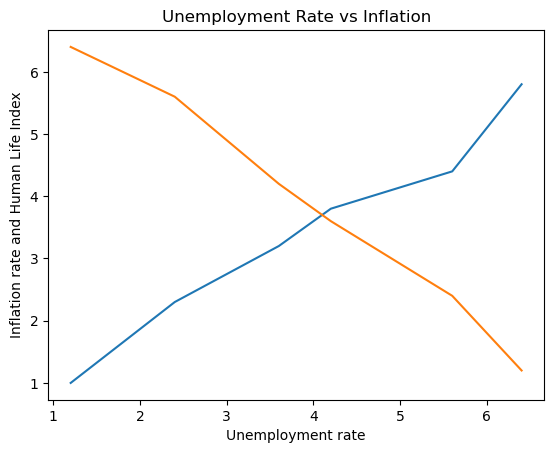

In [15]:
plt.plot (x,y)
plt.plot (x,z)
plt.title("Unemployment Rate vs Inflation")
plt.xlabel("Unemployment rate")
plt.ylabel("Inflation rate and Human Life Index")
plt.legend = (["This is Inflation rate", "This is Human Life Index" ])
plt.show()

In [3]:
import pandas as pd
from io import StringIO

# Define your data as a multiline string
data = """Year    Value1    Value2    Value3    Value4
1980    31.4    106.3    6.0     11.2
1988    104.1   489.0    13.9    29.1
1989    127.5   515.4    11.9    24.9
1990    140.5   457.1    11.5    23.0
1991    136.1   498.6    12.2    23.0
1992    137.9   498.8    10.2    22.2
1993    139.9   530.0    8.3     17.4
1994    145.2   529.4    9.4     20.0
1995    128.4   487.9    7.9     21.0
"""

# Use StringIO to simulate a file
data_io = StringIO(data)

# Read the data into a DataFrame
df = pd.read_csv(data_io, delim_whitespace=True)

# Display the DataFrame
df


,Year,Value1,Value2,Value3,Value4
0,1980,31.4,106.3,6.0,11.2
1,1988,104.1,489.0,13.9,29.1
2,1989,127.5,515.4,11.9,24.9
3,1990,140.5,457.1,11.5,23.0
4,1991,136.1,498.6,12.2,23.0
5,1992,137.9,498.8,10.2,22.2
6,1993,139.9,530.0,8.3,17.4
7,1994,145.2,529.4,9.4,20.0
8,1995,128.4,487.9,7.9,21.0


In [4]:
# Rename the columns
df = df.rename(columns={
    'Value1': 'EDT/GNP', 
    'Value2': 'EDT/X', 
    'Value3': 'INT/X', 
    'Value4': 'TDS/X'
})

# Display the updated DataFrame
df

,Year,EDT/GNP,EDT/X,INT/X,TDS/X
0,1980,31.4,106.3,6.0,11.2
1,1988,104.1,489.0,13.9,29.1
2,1989,127.5,515.4,11.9,24.9
3,1990,140.5,457.1,11.5,23.0
4,1991,136.1,498.6,12.2,23.0
5,1992,137.9,498.8,10.2,22.2
6,1993,139.9,530.0,8.3,17.4
7,1994,145.2,529.4,9.4,20.0
8,1995,128.4,487.9,7.9,21.0


Mean Squared Error: 2.2738431480446715
R-squared: 0.8487018458346737
Coefficients: [-0.02195131  0.01816424  1.25466391]
Intercept: 2.7146848720637173


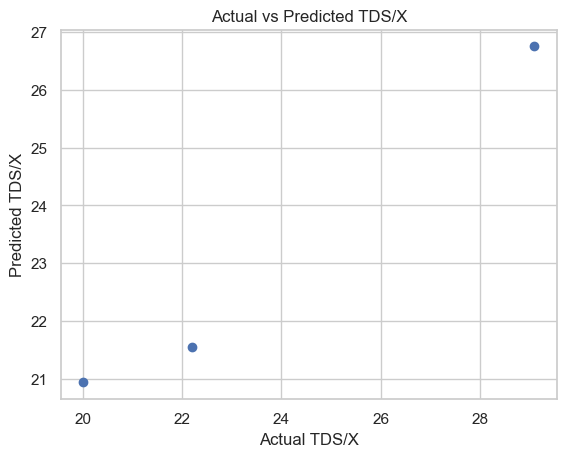

In [9]:
import pandas as pd
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



# Independent variables (X) and Dependent variable (y)
X = df[['EDT/GNP', 'EDT/X', 'INT/X']]  # Features
y = df['TDS/X']  # Target

# Split data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create linear regression model
model = LinearRegression()

# Fit the model with training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual TDS/X")
plt.ylabel("Predicted TDS/X")
plt.title("Actual vs Predicted TDS/X")
plt.show()


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO

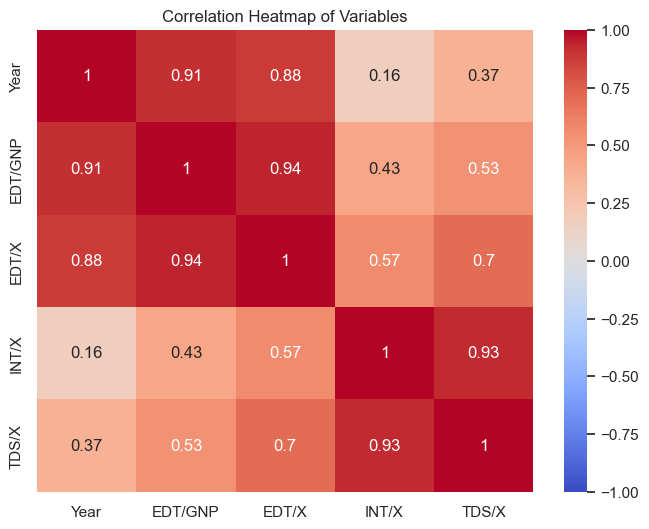

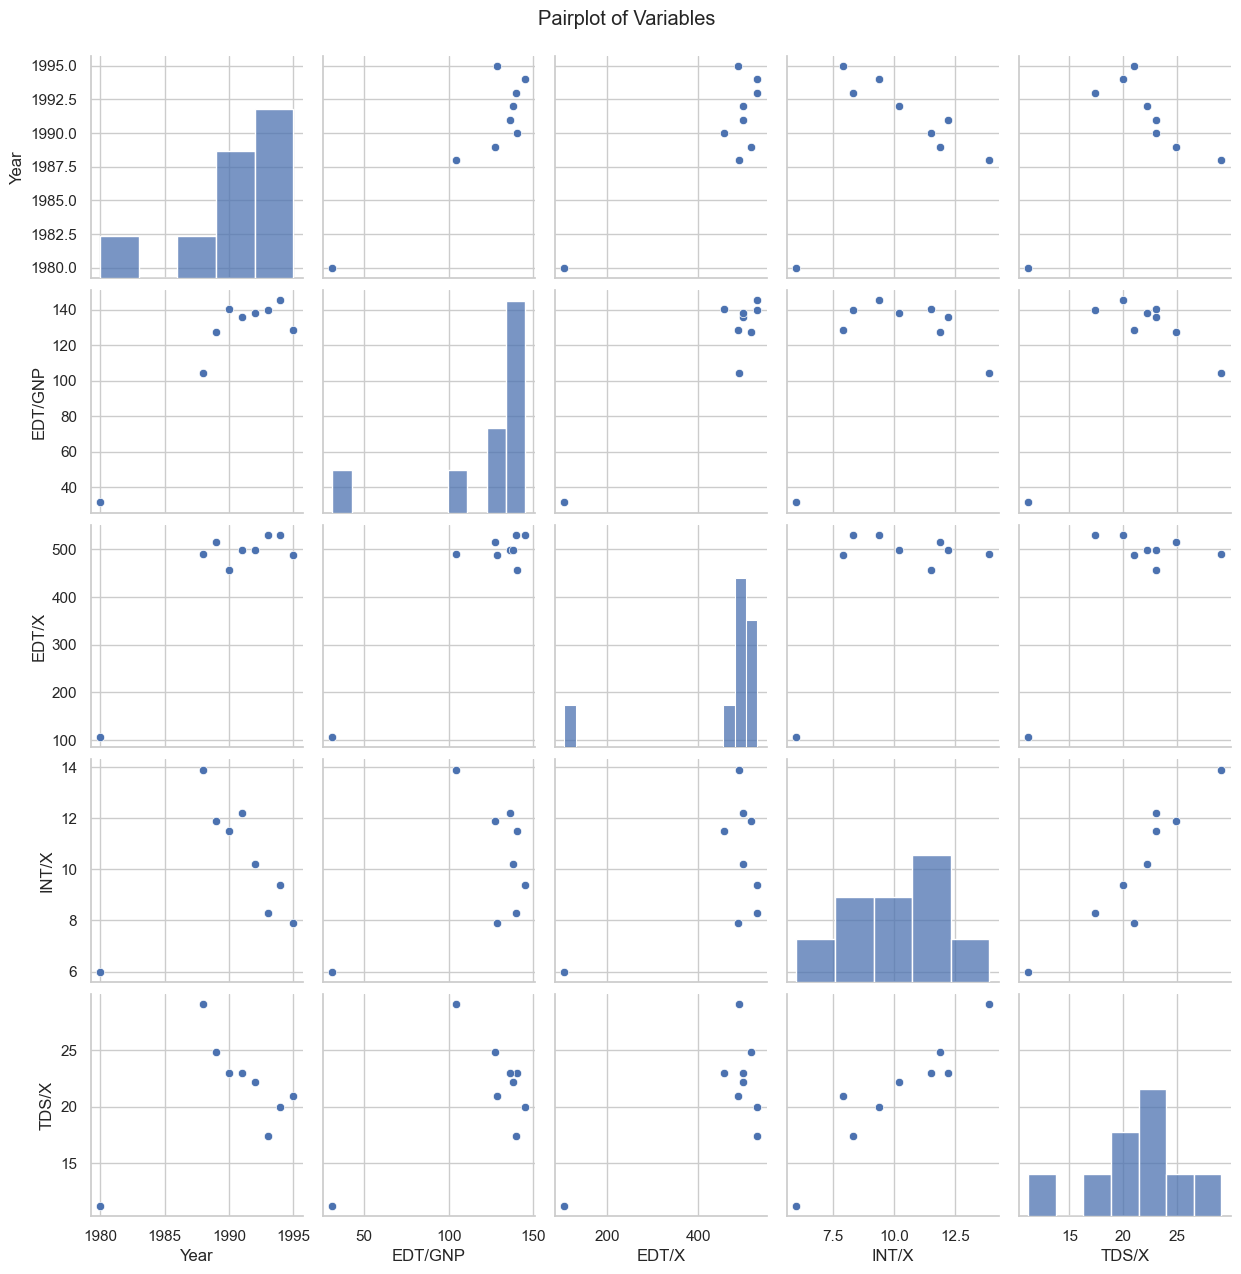

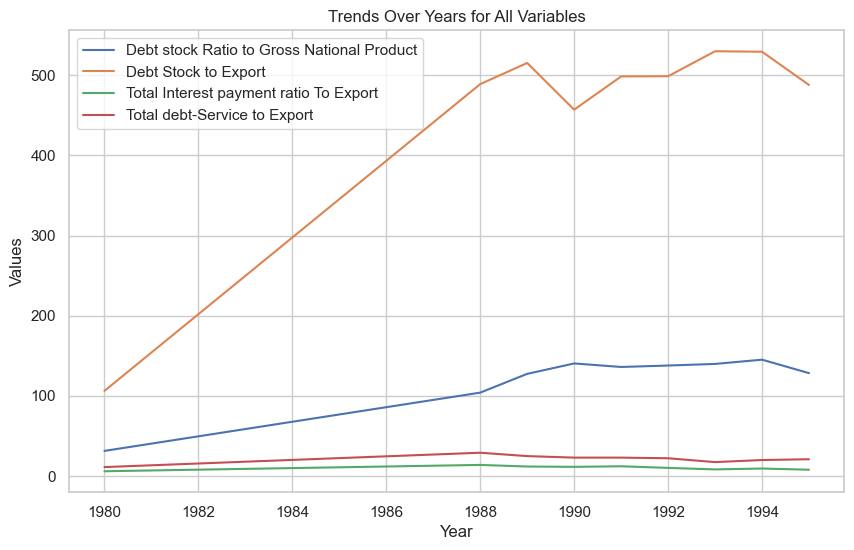

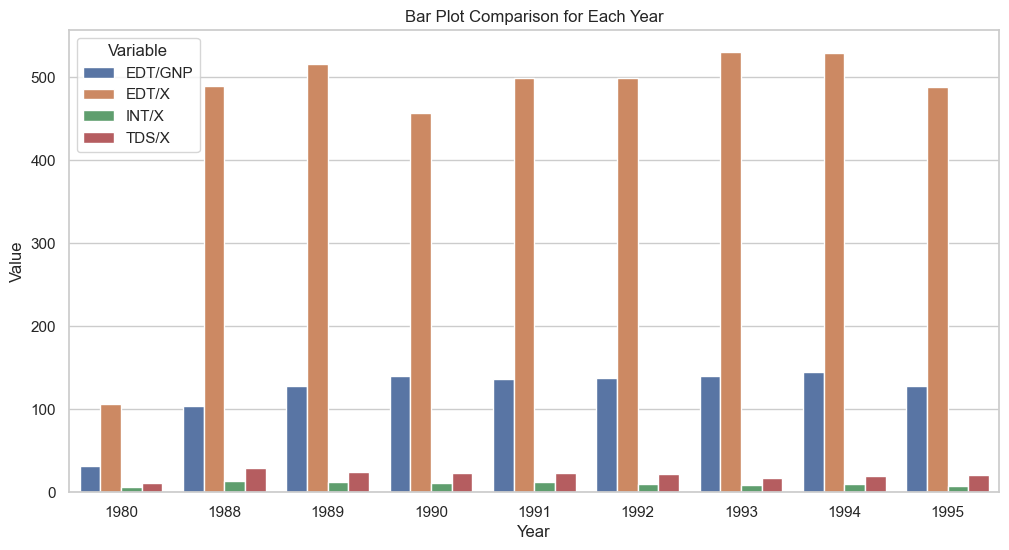

In [10]:
# Set the style of the plots
sns.set(style="whitegrid")

# 1. Correlation Heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Variables")
plt.show()

# 2. Pairplot for relationships between variables
sns.pairplot(df)
plt.suptitle("Pairplot of Variables", y=1.02)
plt.show()

# 3. Line Plot for the trends over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='EDT/GNP', data=df, label="Debt stock Ratio to Gross National Product")
sns.lineplot(x='Year', y='EDT/X', data=df, label="Debt Stock to Export")
sns.lineplot(x='Year', y='INT/X', data=df, label="Total Interest payment ratio To Export")
sns.lineplot(x='Year', y='TDS/X', data=df, label="Total debt-Service to Export")
plt.title("Trends Over Years for All Variables")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()

# 4. Bar Plot to compare each year
df_melted = df.melt('Year', var_name='Variable', value_name='Value')
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Value', hue='Variable', data=df_melted)
plt.title("Bar Plot Comparison for Each Year")
plt.show()